In [2]:
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

from pypower import CatalogFFTPower, PowerSpectrumSmoothWindow, PowerSpectrumSmoothWindowMatrix
from mockfactory import Catalog, utils
import pycorr

import os
plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

## Load two point counter

### Pairs counts as a function of $\theta$

In [3]:
versions = ['y1_full_noveto', 'y1_secondgen_emulator']
tracers = {version: ['ELG_LOP{}'.format('notqso' if version!='y1_secondgen_emulator' else ''), 'LRG', 'QSO'] for version in versions}

data_dir = '/global/cfs/cdirs/desi/users/mpinon/DDtests/ddcounts/'
fn_fibered = {version: {tracer: '{}_DD_theta_{}_fa{}_thetamax10.npy'.format(version, tracer, '_NGC' if version=='y1_secondgen_altmtl' else '') for tracer in tracers[version]} for version in versions}
fn_complete = {version: {tracer: '{}_DD_theta_{}_complete{}_thetamax10.npy'.format(version, tracer, '_NGC' if version=='y1_secondgen_altmtl' else '') for tracer in tracers[version]} for version in versions}

counter_fibered_theta = {version: {tracer: pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_fibered[version][tracer])) for tracer in tracers[version]} for version in versions}
counter_complete_theta = {version: {tracer: pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_complete[version][tracer])) for tracer in tracers[version]} for version in versions}

## Plot $DD^{fibered}/DD^{complete}$ as a function of $\theta$

In [4]:
theta = counter_fibered_theta['y1_full_noveto']['LRG'].sepavg()

In [5]:
dd_fibered_theta = {version: {tracer: counter_fibered_theta[version][tracer].wcounts/counter_fibered_theta[version][tracer].wnorm for tracer in tracers[version]} for version in versions}
dd_complete_theta = {version: {tracer: counter_complete_theta[version][tracer].wcounts/counter_complete_theta[version][tracer].wnorm for tracer in tracers[version]} for version in versions}

In [6]:
window_theta = {version: {tracer: dd_fibered_theta[version][tracer] / dd_complete_theta[version][tracer] for tracer in tracers[version]} for version in versions}

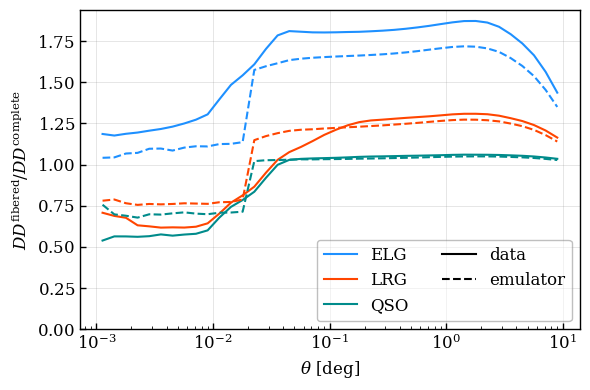

In [7]:
ls = {'y1_full_noveto': '-', 'y1_secondgen_emulator': '--', 'y1_secondgen_altmtl': ':'}
version_labels = {'y1_full_noveto': 'data', 'y1_secondgen_emulator': 'emulator', 'y1_secondgen_altmtl': 'altmtl'}

for version in versions:
    for i, tracer in enumerate(tracers[version]):
        plt.semilogx(theta, window_theta[version][tracer], label=r'{}'.format(tracer[:3]) if version=='y1_full_noveto' else '', ls=ls[version], color='C{}'.format(i))
    plt.plot([], [], color='black', label=version_labels[version], ls=ls[version])
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$DD^{\mathrm{fibered}}/DD^{\mathrm{complete}}$')
plt.legend(ncol=2)
plt.ylim(ymin=0)
plt.savefig(os.path.join(plots_dir, 'dd_fibered_to_dd_complete_theta_y1_full_noveto_emulator_alltracers.png'), dpi=200)
plt.show()

## SGC vs NGC

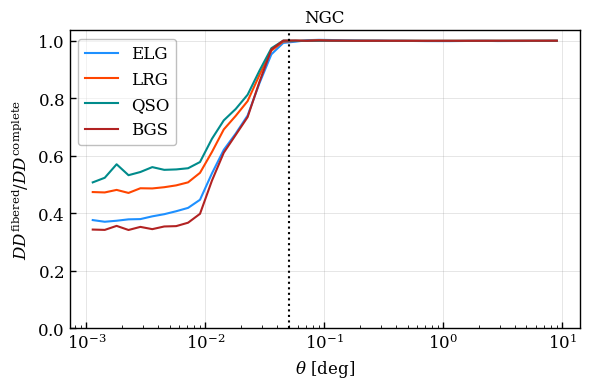

In [82]:
region = 'NGC'

ls = {'y1_full_noveto': '-', 'y1_secondgen_emulator': '--', 'y1_secondgen_altmtl': ':', 'y1_full_HPmapcut': '-'}
version_labels = {'y1_full_noveto': 'data (noveto)', 'y1_secondgen_emulator': 'emulator', 'y1_secondgen_altmtl': 'altmtl', 'y1_full_HPmapcut': 'data (HPmapcut)'}

versions = ['y1_full_HPmapcut']
weights = {'y1_full_HPmapcut': 'WEIGHT_', 'y1_secondgen_emulator': 'WEIGHT_IIP_'}
tracers = {version: ['ELG_LOP{}'.format('notqso' if version!='y1_secondgen_emulator' else ''), 'LRG', 'QSO', 'BGS_BRIGHT'] for version in versions}

data_dir = '/global/cfs/cdirs/desi/users/mpinon/DDtests/ddcounts/'
fn_fibered = {version: {tracer: '{}_DD_theta_{}_fa_{}_{}thetamax10.npy'.format(version, tracer, region, weights[version]) for tracer in tracers[version]} for version in versions}
fn_complete = {version: {tracer: '{}_DD_theta_{}_complete_{}_thetamax10.npy'.format(version, tracer, region) for tracer in tracers[version]} for version in versions}

counter_fibered_theta = {version: {tracer: pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_fibered[version][tracer])) for tracer in tracers[version]} for version in versions}
counter_complete_theta = {version: {tracer: pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_complete[version][tracer])) for tracer in tracers[version]} for version in versions}

dd_fibered_theta = {version: {tracer: counter_fibered_theta[version][tracer].wcounts/counter_fibered_theta[version][tracer].wnorm for tracer in tracers[version]} for version in versions}
dd_complete_theta = {version: {tracer: counter_complete_theta[version][tracer].wcounts/counter_complete_theta[version][tracer].wnorm for tracer in tracers[version]} for version in versions}

window_theta = {version: {tracer: dd_fibered_theta[version][tracer] / dd_complete_theta[version][tracer] for tracer in tracers[version]} for version in versions}

for version in versions:
    for i, tracer in enumerate(tracers[version]):
        if 'data' in version_labels[version]:
            label=r'{}'.format(tracer[:3])
        else:
            label=''
        plt.semilogx(theta, window_theta[version][tracer], label=label, ls=ls[version], color='C{}'.format(i))
    #plt.plot([], [], color='black', label=version_labels[version], ls=ls[version])
    plt.axvline(0.05, ls=':', color='black')
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$DD^{\mathrm{fibered}}/DD^{\mathrm{complete}}$')
plt.legend()
plt.ylim(ymin=0)
plt.title(region)
plt.savefig(os.path.join(plots_dir, 'dd_fibered_to_dd_complete_{}_theta_{}_weights_alltracers.png'.format(region, '_'.join(versions))), dpi=200)
plt.show()

In [51]:
'_'.join(versions)

'y1_full_HPmapcut_y1_secondgen_emulator'